In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans


In [2]:
# 1a
np.random.seed(42)

n = 100
std = 1

mean1 = [1, 1]
mean2 = [5, 5]

class1 = np.random.normal(loc=mean1, scale=std, size=(n, 2))
class2 = np.random.normal(loc=mean2, scale=std, size=(n, 2))

# Combine Data
data = np.vstack((class1, class2))

print(data.shape)
print(data[:5])

(200, 2)
[[1.49671415 0.8617357 ]
 [1.64768854 2.52302986]
 [0.76584663 0.76586304]
 [2.57921282 1.76743473]
 [0.53052561 1.54256004]]


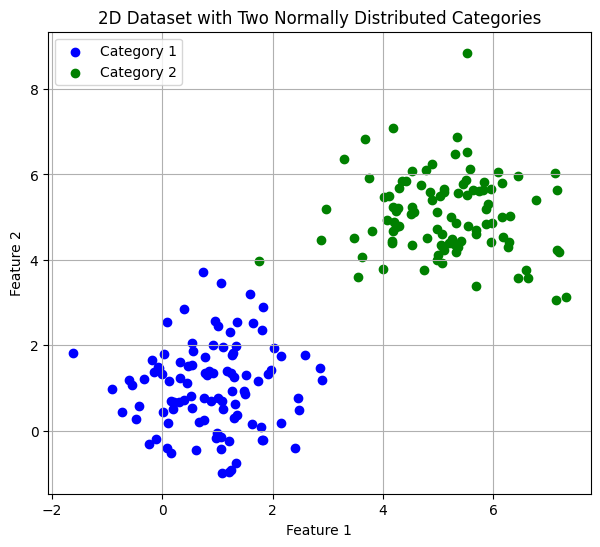

In [3]:
# 1b 
# Visualize Data
plt.figure(figsize=(7, 6))
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Category 1')
plt.scatter(class2[:, 0], class2[:, 1], color='green', label='Category 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Dataset with Two Normally Distributed Categories')

plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Step 2
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def initialize_centroids(data, K=2):
    indices = np.random.choice(data.shape[0], K, replace=False)
    centroids = data[indices]
    return centroids



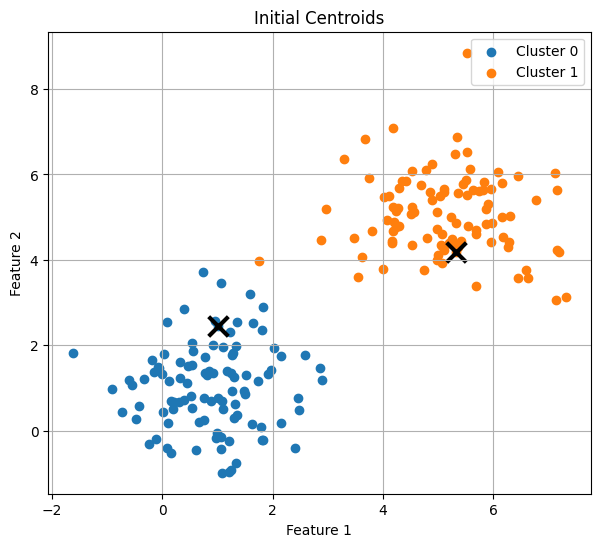

In [ ]:
K = 2
init_centroids = initialize_centroids(data, K)

plt.figure(figsize=(7, 6))

# Plot
plt.scatter(class1[:, 0], class1[:, 1], label='Cluster 0')
plt.scatter(class2[:, 0], class2[:, 1], label='Cluster 1')
plt.scatter(
    init_centroids[:, 0],
    init_centroids[:, 1],
    marker='x',
    s=200,
    linewidths=3,
    color='black'
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Initial Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def assign_cluster(data, centroids):
    N = data.shape[0]
    K = centroids.shape[0]

    labels = np.zeros(N, dtype=int)

    for i in range(N):
        distances = []

        for k in range(K):
            dist = euclidean_distance(data[i], centroids[k])
            distances.append(dist)

        # Assign point to closest centroid
        labels[i] = np.argmin(distances)

    return labels

def update_centroids(data, labels, K):
    D = data.shape[1]
    new_centroids = np.zeros((K, D))

    for k in range(K):
        cluster_points = data[labels == k]
        new_centroids[k] = np.mean(cluster_points, axis=0)

    return new_centroids

def kmeans(data, K, max_iters=100):
    # Initialize centroids
    centroids = initialize_centroids(data, K)

    for _ in range(max_iters):
        # Assign clusters
        labels = assign_cluster(data, centroids)
        # Update centroids
        new_centroids = update_centroids(data, labels, K)

        # Convergence
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids

    return centroids, labels

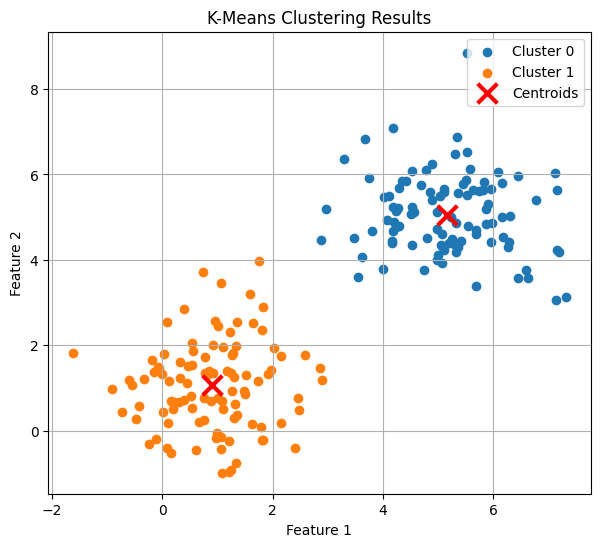

In [7]:
# Run K-means
K = 2
final_centroids, labels = kmeans(data, K)


plt.figure(figsize=(7, 6))

# Plot clustered points
plt.scatter(
    data[labels == 0, 0],
    data[labels == 0, 1],
    label='Cluster 0'
)

plt.scatter(
    data[labels == 1, 0],
    data[labels == 1, 1],
    label='Cluster 1'
)

# Plot centroids
plt.scatter(
    final_centroids[:, 0],
    final_centroids[:, 1],
    marker='x',
    s=200,
    linewidths=3,
    color='red',
    label='Centroids'
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid(True)
plt.show()


Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Testing Images Shape: (10000, 28, 28)
Testing Labels Shape: (10000,)


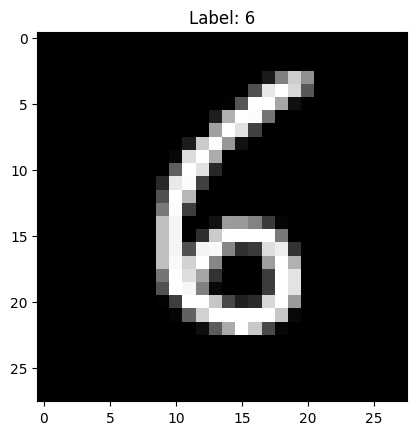

Original shape of label: (60000,)
One-hot encoded label shape: (60000, 10)
shape  (60000, 784)


In [8]:
# Loading from HW4
import gzip
import struct
import random

def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

train_images = read_idx('MNIST/train-images-idx3-ubyte.gz')
train_labels = read_idx('MNIST/train-labels-idx1-ubyte.gz')
test_images = read_idx('MNIST/t10k-images-idx3-ubyte.gz')
test_labels = read_idx('MNIST/t10k-labels-idx1-ubyte.gz')

print(f"Training Images Shape: {train_images.shape}")
print(f"Training Labels Shape: {train_labels.shape}")

print(f"Testing Images Shape: {test_images.shape}")
print(f"Testing Labels Shape: {test_labels.shape}")

random_idx = random.randint(0, len(train_images) - 1)

plt.imshow(train_images[random_idx], cmap='gray')
plt.title(f'Label: {train_labels[random_idx]}')
plt.show()

# Normalize pixels to be between 0 and 1
train_images_normalized = train_images.astype(np.float32) / 255.0
train_images_flat = train_images_normalized.reshape(train_images_normalized.shape[0], -1)

test_images_normalized = test_images.astype(np.float32) / 255.0
test_images_flat = test_images_normalized.reshape(test_images_normalized.shape[0], -1)

# Use one-hot encoding for labels
train_labels_onehot = np.eye(10)[train_labels]

print(f"Original shape of label: {train_labels.shape}")
print(f"One-hot encoded label shape: {train_labels_onehot.shape}")
print("shape ", train_images_flat.shape)


In [9]:
# Train with varying K values
K_values = [10, 16, 64, 256]
models = {}
inertias = {}

for K in K_values:
    print(f"K = {K}")

    m = MiniBatchKMeans(
        n_clusters=K,
        batch_size=1024,
        max_iter=100,
        random_state=42
    )

    m.fit(train_images_flat)

    models[K] = m
    inertias[K] = m.inertia_

    print(f"Inertia for K={K}: {m.inertia_}\n")

K = 10
Inertia for K=10: 2385288.75

K = 16
Inertia for K=16: 2207307.5

K = 64
Inertia for K=64: 1802896.5

K = 256
Inertia for K=256: 1504250.375



In [10]:
def assign_labels_to_clusters(clusters, true_labels, k):
    labels = np.zeros_like(clusters)
    for i in range(k):
        mask = (clusters == i)
        # Assign the most common label to the centroid
        labels[mask] = np.bincount(true_labels[mask]).argmax()
    return labels

def manual_accuracy_score(true_labels, predicted_labels):
    correct_predictions = sum(p == t for p, t in zip(predicted_labels, true_labels))
    accuracy = correct_predictions / len(true_labels)
    return accuracy

In [11]:
for K in inertias:
    print(f"K = {K:3d} Inertia = {inertias[K]:.2f}")


K =  10 Inertia = 2385288.75
K =  16 Inertia = 2207307.50
K =  64 Inertia = 1802896.50
K = 256 Inertia = 1504250.38


In [12]:
# Select best K (minimum inertia)
best_K = min(inertias, key=inertias.get)
best_model = models[best_K]
print(f"Best K: {best_K}")

Best K: 256


In [13]:
# .score() returns the negative inertia (make it positive)
test_inertia = best_model.score(test_images_flat) * -1
print(f"Test Inertia (K={best_K}): {test_inertia}")

Test Inertia (K=256): 252955.921875


In [14]:
# Predict clusters
test_clusters = best_model.predict(test_images_flat)

# Map clusters to labels
test_predicted_labels = assign_labels_to_clusters(
    test_clusters,
    test_labels,
    best_K
)

# Accuracy
test_accuracy = manual_accuracy_score(
    test_labels,
    test_predicted_labels
)

print(f"Accuracy (K={best_K}): {test_accuracy:.4f}")

Accuracy (K=256): 0.9099
